**Regresión a partir de un dataset numérico**

In [37]:
# Importamos las librerias necesarias
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, callbacks
from sklearn.model_selection import train_test_split
import sklearn.datasets as skdata
import matplotlib.pyplot as plt

In [38]:
# Cargamos un dataset de prueba de la librería sklearn
X, y = skdata.fetch_california_housing(return_X_y=True)
print("Son", X.shape[0], "conjuntos de datos")
print("Existen", X.shape[1], "descriptores")

# Normalizamos los datos
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']


# Separamos la muestra en test y training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Separamos la muestra de training en training y validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.30, random_state=42)

Son 20640 conjuntos de datos
Existen 8 descriptores


In [39]:
# Creamos el modelo añadiendo cada capa 
input = tf.keras.Input(name='Input', shape=(X.shape[1],))
h1 = layers.Dense(name='Dense1', units=64, activation='relu', kernel_initializer='normal')(input)
h2 = layers.Dense(name='Dense2', units=64, activation='relu', kernel_initializer='normal')(h1)
d1 = layers.Dropout(name='Dropout1', rate=0.3)(h2)
h3 = layers.Dense(name='Dense3', units=240, activation='relu', kernel_initializer='normal')(d1)
h4 = layers.Dense(name='Dense4', units=240, activation='relu', kernel_initializer='normal')(h3)
d2 = layers.Dropout(name='Dropout2', rate=0.4)(h4)
h5 = layers.Dense(name='Dense5', units=180, activation='relu', kernel_initializer='normal')(d2)
d3 = layers.Dropout(name='Dropout3', rate=0.3)(h5)
output = layers.Dense(name='Output', units=1, kernel_initializer='normal')(h5)

model=tf.keras.models.Model(inputs=input, outputs=output, name="Regressor")

# Compilamos empleando el accuracy para medir el funcionamiento del modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [40]:
# Mostramos un resumen de nuestro modelo
model.summary()

Model: "Regressor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 8)]               0         
                                                                 
 Dense1 (Dense)              (None, 64)                576       
                                                                 
 Dense2 (Dense)              (None, 64)                4160      
                                                                 
 Dropout1 (Dropout)          (None, 64)                0         
                                                                 
 Dense3 (Dense)              (None, 240)               15600     
                                                                 
 Dense4 (Dense)              (None, 240)               57840     
                                                                 
 Dropout2 (Dropout)          (None, 240)               0 

In [41]:
# Creamos un callback para guardar el mejor modelo
best_model_callback = callbacks.ModelCheckpoint("best_model.h5",
                                                monitor='val_accuracy',
                                                save_best_only=True)

# Entrenamos el modelo
hist = model.fit(X_train, y_train,
                 validation_data=(X_val, y_val), 
                 epochs=100,        # epoch: número de veces que verá todos los datos
                 batch_size=24, # batch: número de datos que ve por pasada
                 callbacks=[best_model_callback],
                 verbose=1)

Epoch 1/100
422/422 [==============================] - 1s 2ms/step - loss: 1.6384 - accuracy: 0.0032 - val_loss: 1.4290 - val_accuracy: 0.0030
Epoch 2/100
422/422 [==============================] - 1s 2ms/step - loss: 1.2988 - accuracy: 0.0033 - val_loss: 1.1873 - val_accuracy: 0.0030
Epoch 3/100
422/422 [==============================] - 1s 2ms/step - loss: 1.0115 - accuracy: 0.0033 - val_loss: 0.8983 - val_accuracy: 0.0030
Epoch 4/100
422/422 [==============================] - 1s 2ms/step - loss: 0.9947 - accuracy: 0.0033 - val_loss: 1.1227 - val_accuracy: 0.0030
Epoch 5/100
422/422 [==============================] - 1s 2ms/step - loss: 0.9466 - accuracy: 0.0033 - val_loss: 0.7073 - val_accuracy: 0.0030
Epoch 6/100
422/422 [==============================] - 1s 2ms/step - loss: 0.8137 - accuracy: 0.0033 - val_loss: 0.8160 - val_accuracy: 0.0030
Epoch 7/100
422/422 [==============================] - 1s 2ms/step - loss: 0.8008 - accuracy: 0.0033 - val_loss: 0.6406 - val_accuracy: 0.0030

In [42]:
# Evaluamos el modelo con el dataset de test
score = model.evaluate(X_test,y_test)
score

194/194 [==============================] - 0s 926us/step - loss: 0.4979 - accuracy: 0.0026


[0.4979105293750763, 0.002583979396149516]

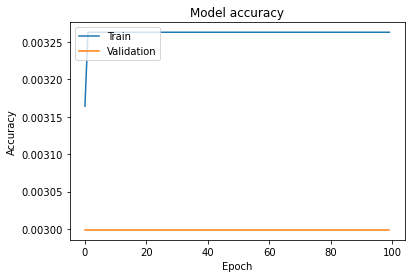

In [43]:
# Mostramos el accuracy en validación y test para las epochs
%matplotlib inline

# Plot training & validation accuracy values
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [44]:
# Empleamos el modelo para predecir
preds_test = model.predict(X_test)
preds_test.shape

(6192, 1)

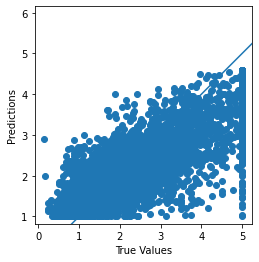

In [48]:
plt.scatter(y_test, preds_test.flatten())
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
#plt.xlim([0,plt.xlim()[1]])
#plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])